In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

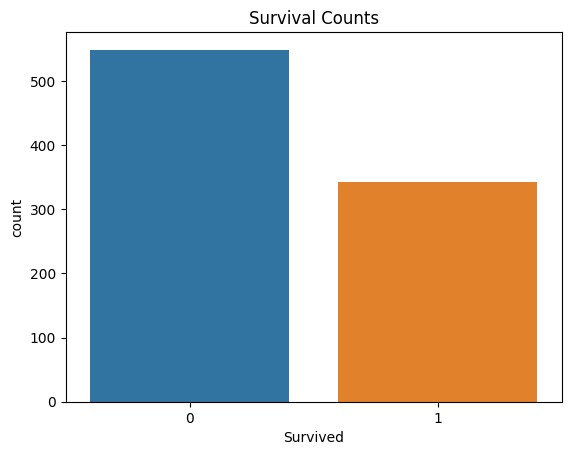

In [4]:
#EDA-查看生还比例
sns.countplot(x='Survived',data=train)
plt.title('Survival Counts')
plt.show()

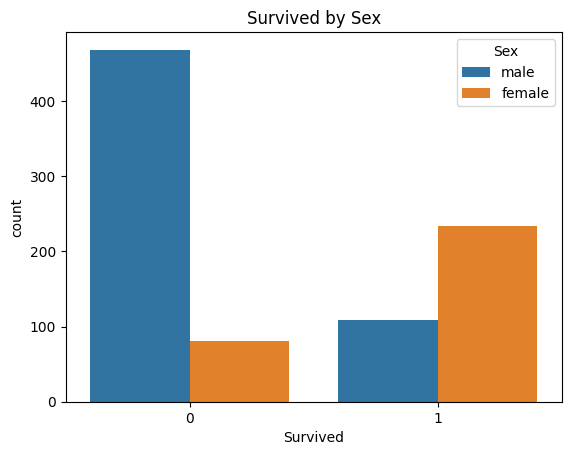

In [5]:
#按性别查看生还率
sns.countplot(x='Survived',hue ='Sex',data=train)
plt.title('Survived by Sex')
plt.show()

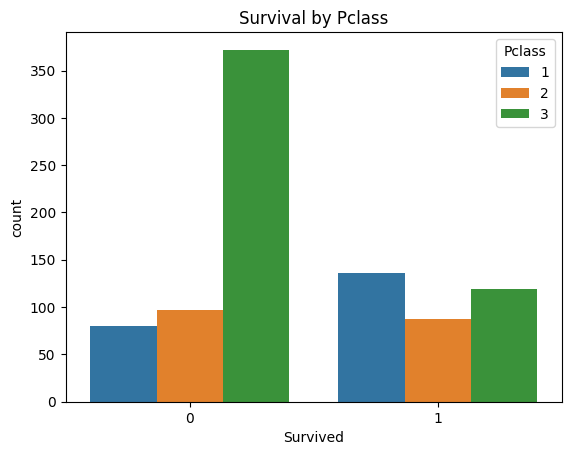

In [6]:
#按船舱等级查看
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.title('Survival by Pclass')
plt.show()

In [7]:
# 使用 loc + boolean mask
train.loc[:, 'Age'] = train['Age'].fillna(train['Age'].median())
test.loc[:, 'Age'] = test['Age'].fillna(test['Age'].median())

train.loc[:, 'Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test.loc[:, 'Fare'] = test['Fare'].fillna(test['Fare'].median())


In [8]:
#转换类别为数值
train['Sex'] = train['Sex'].map({'male':0,'female':1})
test['Sex'] = test['Sex'].map({'male':0,'female':1})
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2})

In [9]:
#特征选择
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = train[features]
y = train['Survived']
X_test = test[features]


In [10]:
#建模&预测
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [11]:
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[3,5,7],
    'min_samples_split':[2,4,6]
}
clf = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
clf.fit(X,y)
print("Best Params:",clf.best_params_)


Best Params: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}


In [12]:
#训练集准确率
train_pred = clf.predict(X)
print("Train Accuracy:",accuracy_score(y,train_pred))

Train Accuracy: 0.8843995510662177


In [13]:
#在测试集上预测
predictions =clf.predict(X_test)

In [14]:
#生成提交文件
output = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':predictions})
output.to_csv('submission.csv',index=False)
print("提交报告已生成：submission.csv")

提交报告已生成：submission.csv
